In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Install the Kaggle API client
!pip install kaggle

# Make the Kaggle directory and move the kaggleCRtest.json file there
!mkdir -p ~/.kaggle
!cp kaggleCRtest.json ~/.kaggle/kaggle.json

# Change the permissions of the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

# Download the Crop Recommendation Dataset from Kaggle
!kaggle datasets download -d atharvaingle/crop-recommendation-dataset

# Unzip the dataset
!unzip crop-recommendation-dataset.zip -d crop-recommendation-dataset


cp: cannot stat 'kaggleCRtest.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset
License(s): apache-2.0
100% 63.7k/63.7k [00:00<00:00, 332kB/s]
100% 63.7k/63.7k [00:00<00:00, 332kB/s]
Archive:  crop-recommendation-dataset.zip
  inflating: crop-recommendation-dataset/Crop_recommendation.csv  


In [ ]:
# Read the CSV file
csv_path = 'crop-recommendation-dataset/Crop_recommendation.csv'
crop= pd.read_csv(csv_path)


In [ ]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
crop.shape

(2200, 8)

In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
crop.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool>

In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
numeric_crop = crop.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_crop.corr()

# Display the correlation matrix
print(correlation_matrix)

                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


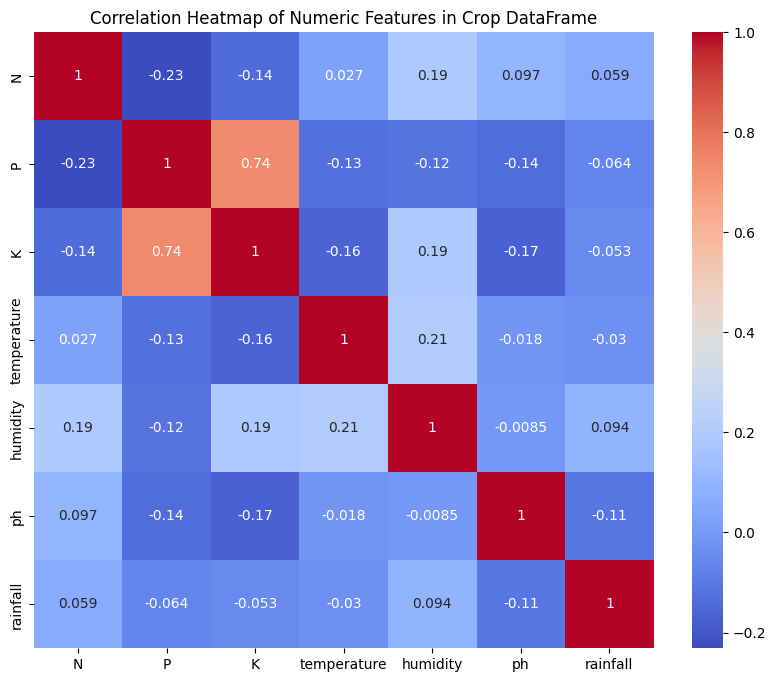

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cbar=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features in Crop DataFrame')
plt.show()

In [ ]:
crop.label.value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [ ]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
crop['label'].unique().size

22

<ipython-input-15-2a6032d74dd9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['P'])


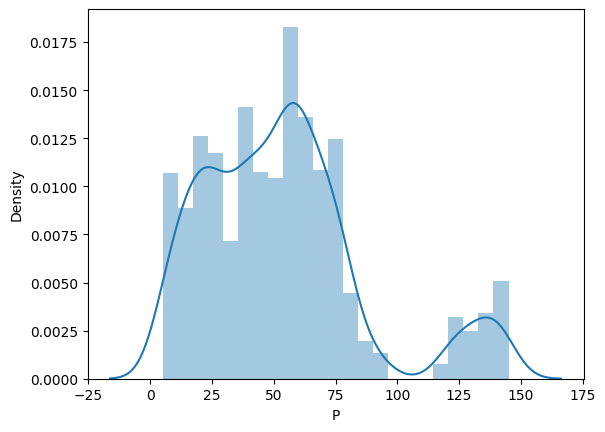

In [ ]:
sns.distplot(crop['P'])
plt.show()


In [ ]:
crop_dict = {
    'rice': 1, 'maize': 2, 'jute': 3, 'cotton': 4, 'coconut': 5, 'papaya': 6, 'orange': 7, 'apple': 8, 'muskmelon': 9,
    'watermelon': 10, 'grapes': 11, 'mango': 12, 'banana': 13, 'pomegranate': 14, 'lentil': 15, 'blackgram': 16,
    'mungbean': 17, 'mothbeans': 18, 'pigeonpeas': 19, 'kidneybeans': 20, 'chickpea': 21, 'coffee': 22
}
crop['label']=crop['label'].map(crop_dict)

In [ ]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [ ]:
crop.label.unique()

array([ 1,  2, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
        6,  5,  4,  3, 22])

In [ ]:
crop.label.value_counts()

,count
label,
1,100
2,100
21,100
20,100
19,100
18,100
17,100
16,100
15,100


In [ ]:
X=crop.drop('label',axis=1)
y=crop['label']


In [ ]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [ ]:
y.head()

,label
0,1
1,1
2,1
3,1
4,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(1760, 7)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()

# Fit and transform the training data
X_train = mx.fit_transform(X_train)

# Transform the test data
X_test = mx.transform(X_test)

In [ ]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier()
}


In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f'{name} model with accuracy: {score}')

LogisticRegression model with accuracy: 0.9636363636363636
GaussianNB model with accuracy: 0.9954545454545455
SVC model with accuracy: 0.9681818181818181
KNeighborsClassifier model with accuracy: 0.9590909090909091
DecisionTreeClassifier model with accuracy: 0.9818181818181818
ExtraTreeClassifier model with accuracy: 0.8954545454545455
RandomForestClassifier model with accuracy: 0.9931818181818182
BaggingClassifier model with accuracy: 0.9886363636363636
GradientBoostingClassifier model with accuracy: 0.9818181818181818


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier model with accuracy: 0.09545454545454546


In [ ]:
randclf = RandomForestClassifier()
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)
accuracy_score(y_test, y_pred)


0.9931818181818182

In [ ]:
crop.columns


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    mx_features = mx.fit_transform(features)
    sc_mx_features = sc.fit_transform(mx_features)
    prediction = randclf.predict(sc_mx_features).reshape(1, -1)
    return prediction[0]

In [ ]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [ ]:
N = 90
P = 42
K = 43
temperature = 28.879744
humidity = 82.002744
ph = 6.502985
rainfall = 202.935536

predict = recommendation(N, P, K, temperature, humidity, ph, rainfall)
predicted_class = recommendation(N, P, K, temperature, humidity, ph, rainfall)


In [ ]:
predict


array([6])

In [ ]:
def get_crop_name(prediction_value, crop_dict):
    """
    Returns the crop name corresponding to the given prediction value.

    Args:
        prediction_value: The prediction value from the model.
        crop_dict: The dictionary mapping crop names to prediction values.

    Returns:
        The crop name as a string, or None if not found.
    """
    for crop_name, crop_value in crop_dict.items():
        if crop_value == prediction_value:
            return crop_name
    return None  # Return None if the prediction value is not found in the dictionary


# Example usage:
predicted_class = recommendation(N, P, K, temperature, humidity, ph, rainfall)
predicted_crop = get_crop_name(predicted_class[0], crop_dict)

if predicted_crop:
    print(f"The predicted crop is: {predicted_crop}")
else:
    print("Prediction value not found in crop dictionary.")

The predicted crop is: papaya


In [ ]:
import pickle

# Assuming you have trained models and scalers
# Save RandomForest model
with open('model.pkl', 'wb') as f:
    pickle.dump(randclf, f)

# Save MinMaxScaler
with open('minmaxscaler.pkl', 'wb') as f:
    pickle.dump(mx, f)

# Save StandardScaler
with open('standscaler.pkl', 'wb') as f:
    pickle.dump(sc, f)


In [ ]:
from google.colab import files

# Download the files
files.download('model.pkl')
files.download('minmaxscaler.pkl')
files.download('standscaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
'''from tensorflow.keras.models import load_model

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
import os
# List all files in the specified directory
print(os.listdir('/content/drive/MyDrive'))'''



"from tensorflow.keras.models import load_model\n\n# Mount Google Drive\nfrom google.colab import drive\ndrive.mount('/content/drive')\nimport os\n# List all files in the specified directory\nprint(os.listdir('/content/drive/MyDrive'))"

In [ ]:
'''import os
# Create the 'CRmodel' folder in Google Drive if it doesn't exist
crmodel_path = '/content/drive/MyDrive/CRmodel/'
os.makedirs(crmodel_path, exist_ok=True)  # exist_ok=True prevents an error if the folder already exists'''


"import os\n# Create the 'CRmodel' folder in Google Drive if it doesn't exist\ncrmodel_path = '/content/drive/MyDrive/CRmodel/'\nos.makedirs(crmodel_path, exist_ok=True)  # exist_ok=True prevents an error if the folder already exists"

In [ ]:
'''import pickle
import os

# Create the 'CRmodel' folder in Google Drive if it doesn't exist
crmodel_path = '/content/drive/MyDrive/CRmodel/'
os.makedirs(crmodel_path, exist_ok=True)

# Save the model using pickle
with open(os.path.join(crmodel_path, 'adaboost_model.pkl'), 'wb') as f:
    pickle.dump(model, f)

print(f"Model saved to: {os.path.join(crmodel_path, 'adaboost_model.pkl')}")'''


'import pickle\nimport os\n\n# Create the \'CRmodel\' folder in Google Drive if it doesn\'t exist\ncrmodel_path = \'/content/drive/MyDrive/CRmodel/\'\nos.makedirs(crmodel_path, exist_ok=True)\n\n# Save the model using pickle\nwith open(os.path.join(crmodel_path, \'adaboost_model.pkl\'), \'wb\') as f:\n    pickle.dump(model, f)\n\nprint(f"Model saved to: {os.path.join(crmodel_path, \'adaboost_model.pkl\')}")'